In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Load

In [ ]:
!unzip '/content/drive/MyDrive/aiproj.zip' -d '/content/drive/MyDrive/data'


Archive:  /content/drive/MyDrive/aiproj.zip
dbde252466f61411d23e2abe807afc2e2ce4b800
   creating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/CO2_Emissions.xlsx  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Delivery_Deadlines.xlsx  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Delivery_LeadTime.xlsx  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/README.md  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Storage_costs.xlsx  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Supply Chain Optimization.ipynb  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Total_Data.xlsx  
  inflating: /content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Pyth

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 46.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pulp import *

In [ ]:
var_costs = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/variable_costs.xlsx", index_col = 0)
var_costs

,USA,Germany,Japan,Brazil,India
Variable Costs ($/Unit),,,,,
USA,12,12,12,12,12
Germany,13,13,13,13,13
Japan,10,10,10,10,10
Brazil,8,8,8,8,8
India,5,5,5,5,5


In [ ]:
freight_costs = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/freight_costs.xlsx", index_col = 0)
freight_costs

,USA,Germany,Japan,Brazil,India
Freight Costs ($/Container),,,,,
USA,0,12250,1100,16100,8778
Germany,13335,0,8617,20244,10073
Japan,15400,22750,0,43610,14350
Brazil,16450,22050,28000,0,29750
India,13650,15400,24500,29400,0


In [ ]:
stor_costs = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Storage_costs.xlsx", index_col = 0)
stor_costs

,Low,High
Storage Costs ($/unit),,
USA,43.333333,63.333333
Germany,33.200000,48.466667
Japan,41.533333,60.666667
Brazil,21.533333,31.533333
India,14.066667,41.066667


In [ ]:
carb_emissions = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/CO2_Emissions.xlsx", index_col = 0)
carb_emissions

,USA,Germany,Japan,Brazil,India
CO2 Emissions (kgs),,,,,
USA,0.000000,84.062095,299.317166,125.522063,181.069151
Germany,84.062095,0.000000,267.654340,140.791485,149.307907
Japan,299.317166,267.654340,0.000000,282.624979,127.726291
Brazil,125.522063,140.791485,282.624979,0.000000,191.409089
India,181.069151,149.307907,127.726291,191.409089,0.000000


In [ ]:
lead_time = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Delivery_LeadTime.xlsx", index_col = 0)
lead_time

,USA,Germany,Japan,Brazil,India
USA,3,21,65,29,41
Germany,21,3,59,33,34
Japan,65,59,3,62,30
Brazil,29,33,62,3,43
India,41,34,30,43,3


In [ ]:
fixed_costs = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/fixed_cost.xlsx", index_col = 0)
fixed_costs

,Low,High
USA,6500,9500
Germany,4980,7270
Japan,6230,9100
Brazil,3230,4730
India,2110,6160


In [ ]:
delivery_times = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Delivery_LeadTime.xlsx", index_col = 0)
delivery_times

,USA,Germany,Japan,Brazil,India
USA,3,21,65,29,41
Germany,21,3,59,33,34
Japan,65,59,3,62,30
Brazil,29,33,62,3,43
India,41,34,30,43,3


In [ ]:
cap = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/capacity.xlsx", index_col = 0)
cap

,Low,High
Capacity (kUnits/month),,
USA,500,1000
Germany,500,1000
Japan,500,1000
Brazil,500,1000
India,500,1000


In [ ]:
demand = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/demand.xlsx", index_col = 0)
demand

,Demand
(Units/month),
USA,2800000
Germany,90000
Japan,1700000
Brazil,145000
India,160000


In [ ]:
Co2_dict = {'USA':10000000000,'Germany':10000000000,'Japan':10000000000,'Brazil':10000000000,'India':10000000000}
Co2_dict
Co2_Limits  = pd.DataFrame(Co2_dict.items(), columns = ['Country', 'Max CO2 permitted (in kgs)'], )
Co2_Limits.set_index('Country')

In [ ]:
del_deadline = pd.read_excel("/content/drive/MyDrive/data/Supply-Chain-Optimization-Using-Python-main/Delivery_Deadlines.xlsx", index_col = 0)
del_deadline

,USA,Germany,Japan,Brazil,India
USA,30,30,30,30,30
Germany,30,30,30,30,30
Japan,30,30,30,30,30
Brazil,30,30,30,30,30
India,30,30,30,30,30


Data Engineering

In [ ]:
total_costs = freight_costs/1000 + var_costs 
total_costs

,USA,Germany,Japan,Brazil,India
Freight Costs ($/Container),,,,,
USA,12.000,24.25,13.100,28.100,20.778
Germany,26.335,13.00,21.617,33.244,23.073
Japan,25.400,32.75,10.000,53.610,24.350
Brazil,24.450,30.05,36.000,8.000,37.750
India,18.650,20.40,29.500,34.400,5.000


In [ ]:
total_fixed = fixed_costs + stor_costs
total_fixed

,Low,High
USA,6543.333333,9563.333333
Germany,5013.200000,7318.466667
Japan,6271.533333,9160.666667
Brazil,3251.533333,4761.533333
India,2124.066667,6201.066667


Creating a Linear Programming Model from Pulp

In [ ]:
# Define Decision Variables through a list
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low', 'High']

# Initialize Class
model = LpProblem("Capacitated Plant Location Model", LpMinimize)


# Create Decision Variables
x = LpVariable.dicts("production_", [(i,j) for i in loc for j in loc],
                     lowBound=0, upBound=None, cat='continuous')
y = LpVariable.dicts("plant_", 
                     [(i,s) for s in size for i in loc], cat='Binary')
z = LpVariable.dicts("delivery_",[(i,j) for i in loc for j in loc], cat = 'Binary')

# Define Objective Function
model += (lpSum([total_fixed.loc[i,s] * y[(i,s)] * 1000 for s in size for i in loc])
          + lpSum([total_costs.loc[i,j] * x[(i,j)]   for i in loc for j in loc]))

# Add Constraints
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Demand']
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s]*y[(i,s)] * 1000 for s in size])   
for j in loc:
    model += lpSum([carb_emissions.loc[i,j] * x[(i,j)] for i in loc]) <= [5000000000,5000000000,5000000000,5000000000,5000000000]  
    
model += lpSum([delivery_times.loc[i,j] * z[(i,j)] for i in loc for j in loc]) <= (del_deadline.loc[i,j] for i in loc for j in loc)

    
    # Define logical constraint: Add a logical constraint so that if the high capacity plant in USA is open, then a low capacity plant in Germany is also opened.
# model += y[('USA','High_Cap')] <= y[('Germany','Low_Cap')]                                                       
                                                       
# Solve Model
model.solve()
print("Total Costs = {:,} ($/Month)".format(int(value(model.objective))))
print('\n' + "Status: {}".format(LpStatus[model.status]))


# Dictionary to display the output data after optimization:
dict_plant = {}
dict_prod = {}
for v in model.variables():
    if 'plant' in v.name:
        name = v.name.replace('plant__', '').replace('_', '')
        dict_plant[name] = int(v.varValue)
        p_name = name
    else:
        name = v.name.replace('production__', '').replace('_', '')
        dict_prod[name] = v.varValue
    print(name, "=", v.varValue)

Total Costs = 109,556,533 ($/Month)

Status: Optimal
delivery('Brazil','Brazil') = 0.0
delivery('Brazil','Germany') = 0.0
delivery('Brazil','India') = 0.0
delivery('Brazil','Japan') = 0.0
delivery('Brazil','USA') = 0.0
delivery('Germany','Brazil') = 0.0
delivery('Germany','Germany') = 0.0
delivery('Germany','India') = 0.0
delivery('Germany','Japan') = 0.0
delivery('Germany','USA') = 0.0
delivery('India','Brazil') = 0.0
delivery('India','Germany') = 0.0
delivery('India','India') = 0.0
delivery('India','Japan') = 0.0
delivery('India','USA') = 0.0
delivery('Japan','Brazil') = 0.0
delivery('Japan','Germany') = 0.0
delivery('Japan','India') = 0.0
delivery('Japan','Japan') = 0.0
delivery('Japan','USA') = 0.0
delivery('USA','Brazil') = 0.0
delivery('USA','Germany') = 0.0
delivery('USA','India') = 0.0
delivery('USA','Japan') = 0.0
delivery('USA','USA') = 0.0
('Brazil','High') = 0.0
('Brazil','Low') = 1.0
('Germany','High') = 0.0
('Germany','Low') = 0.0
('India','High') = 1.0
('India','Low') = 

/usr/local/lib/python3.9/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Converting the Results to Dataframe

In [ ]:
list_low, list_high = [], []
for l in loc:
    for cap in ['Low', 'High']:
        x = "('{}','{}')".format(l, cap)
        if cap == 'Low':
            list_low.append(dict_plant[x])
        else:
            list_high.append(dict_plant[x])
df_capacity = pd.DataFrame({'Location': loc, 'Low': list_low, 'High': list_high}).set_index('Location')
    
df_capacity

,Low,High
Location,,
USA,1,1
Germany,0,0
Japan,1,1
Brazil,1,0
India,1,1


In [ ]:
USA_List, Germany_List, Japan_List, Brazil_List, India_List = [], [], [], [], [] 
for l in loc:
    for var_costs in ['USA', 'Germany', 'Japan', 'Brazil', 'India']:
        x = "('{}','{}')".format(l, var_costs)
        if var_costs == 'USA':
            USA_List.append(dict_prod[x])
        elif var_costs == 'Germany':
            Germany_List.append(dict_prod[x])
        elif var_costs == 'Japan':
            Japan_List.append(dict_prod[x])
        elif var_costs == 'Brazil':
            Brazil_List.append(dict_prod[x])
        elif var_costs == 'India':
            India_List.append(dict_prod[x])

df_production = pd.DataFrame({'Location': loc, 'USA': USA_List, 'Germany': Germany_List, 'Japan': Japan_List, 'Brazil': Brazil_List, 'India': India_List}).set_index('Location')

df_production

,USA,Germany,Japan,Brazil,India
Location,,,,,
USA,1300000.0,0.0,200000.0,0.0,0.0
Germany,0.0,0.0,0.0,0.0,0.0
Japan,0.0,0.0,1500000.0,0.0,0.0
Brazil,250000.0,0.0,0.0,145000.0,0.0
India,1250000.0,90000.0,0.0,0.0,160000.0


In [ ]:
df_production["Sum"] = df_production.sum(axis=1)
df_production

,USA,Germany,Japan,Brazil,India,Sum
Location,,,,,,
USA,1300000.0,0.0,200000.0,0.0,0.0,1500000.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0
Japan,0.0,0.0,1500000.0,0.0,0.0,1500000.0
Brazil,250000.0,0.0,0.0,145000.0,0.0,395000.0
India,1250000.0,90000.0,0.0,0.0,160000.0,1500000.0


In [ ]:
sum_list = df_production['Sum']
sum_list

Location
USA        1500000.0
Germany          0.0
Japan      1500000.0
Brazil      395000.0
India      1500000.0
Name: Sum, dtype: float64

In [ ]:
low_prod, high_prod = [], []
for i,j,k in zip(list_low, list_high, sum_list):
    if i ==0 and j==1:
        high_prod.append(k)
        low_prod.append(0)
    elif i==1 and j==0:
        low_prod.append(k)
        high_prod.append(0)
    elif i==1 and j==1:
        low_prod.append(500000)
        high_prod.append(k-500000)
    else:
        low_prod.append(0)
        high_prod.append(0)
df_plot = pd.DataFrame({'Location': loc, 'Low': low_prod, 'High': high_prod})
df_plot

,Location,Low,High
0,USA,500000.0,1000000.0
1,Germany,0.0,0.0
2,Japan,500000.0,1000000.0
3,Brazil,395000.0,0.0
4,India,500000.0,1000000.0


Scenario 1: Standard Conditions

In [ ]:
dict_plot1 = {'Location':['USA','Germany','Japan','Brazil','India'], 'Low':[0,0,0,145000,0],'High':[1500000,0,1500000,0,1750000]}
df_plot1 = pd.DataFrame(dict_plot1)
df_plot1

,Location,Low,High
0,USA,0,1500000
1,Germany,0,0
2,Japan,0,1500000
3,Brazil,145000,0
4,India,0,1750000


In [ ]:
dict_sce1 = {'Location':['USA','Germany','Japan','Brazil','India'],
             'USA':[1300000,0,0,0,1500000],
             'Germany':[0,0,0,0,90000],
            'Japan':[200000,0,1500000,0,0],
            'Brazil':[0,0,0,145000,0],
            'India':[0,0,0,0,160000]}
df_sce1 = pd.DataFrame(dict_sce1)
df_sce1

,Location,USA,Germany,Japan,Brazil,India
0,USA,1300000,0,200000,0,0
1,Germany,0,0,0,0,0
2,Japan,0,0,1500000,0,0
3,Brazil,0,0,0,145000,0
4,India,1500000,90000,0,0,160000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

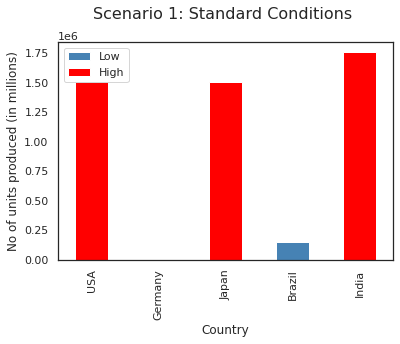

In [ ]:
plot_list = []
sns.set(style = 'white')
scen_1 = df_plot1.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Scenario 1: Standard Conditions \n', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('No of units produced (in millions)')
scen_1
plot_list.append(scen_1)

Scenario 2: Freight costs increase by 3x due to COVID pandemic

In [ ]:
dict_plot2 = {'Location':['USA','Germany','Japan','Brazil','India'], 'Low':[500000,0,500000,145000,0],'High':[1500000,0,1200000,0,1050000]}
df_plot2 = pd.DataFrame(dict_plot2)
df_plot2


,Location,Low,High
0,USA,500000,1500000
1,Germany,0,0
2,Japan,500000,1200000
3,Brazil,145000,0
4,India,0,1050000


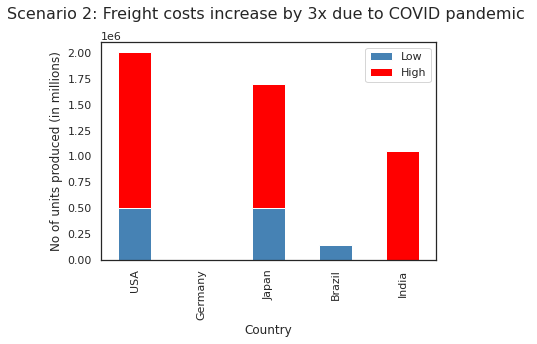

In [ ]:
sns.set(style = 'white')
scen_2 = df_plot2.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Scenario 2: Freight costs increase by 3x due to COVID pandemic \n', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('No of units produced (in millions)')
scen_2
plot_list.append(scen_2)

In [ ]:
dict_sce2 = {'Location':['USA','Germany','Japan','Brazil','India'],
             'USA':[2000000,0,0,0,800000],
             'Germany':[0,0,0,0,90000],
            'Japan':[0,0,1700000,0,0],
            'Brazil':[0,0,0,145000,0],
            'India':[0,0,0,0,160000]}
df_sce2 = pd.DataFrame(dict_sce2)
df_sce2

,Location,USA,Germany,Japan,Brazil,India
0,USA,2000000,0,0,0,0
1,Germany,0,0,0,0,0
2,Japan,0,0,1700000,0,0
3,Brazil,0,0,0,145000,0
4,India,800000,90000,0,0,160000


Scenario 3: Demand increases 5x in Germany, Brazil and India

In [ ]:
dict_plot3 = {'Location':['USA','Germany','Japan','Brazil','India'], 'Low':[0,0,0,0,0],'High':[1500000,0,1500000,725000,2750000]}
df_plot3 = pd.DataFrame(dict_plot3)
df_plot3

,Location,Low,High
0,USA,0,1500000
1,Germany,0,0
2,Japan,0,1500000
3,Brazil,0,725000
4,India,0,2750000


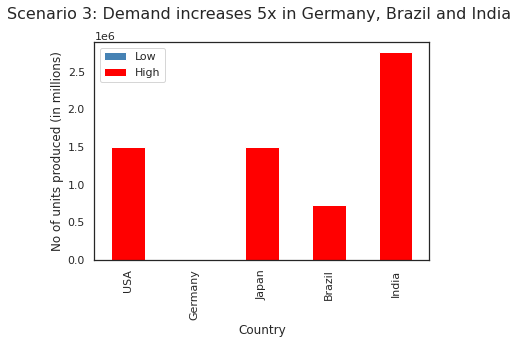

In [ ]:
sns.set(style = 'white')
scen_3 = df_plot3.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Scenario 3: Demand increases 5x in Germany, Brazil and India \n', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('No of units produced (in millions)')
scen_3
plot_list.append(scen_3)

In [ ]:
dict_sce3 = {'Location':['USA','Germany','Japan','Brazil','India'],
             'USA':[1300000,0,0,0,1500000],
             'Germany':[0,0,0,0,450000],
            'Japan':[200000,0,1500000,0,0],
            'Brazil':[0,0,0,725000,0],
            'India':[0,0,0,0,800000]}
df_sce3 = pd.DataFrame(dict_sce3)
df_sce3

,Location,USA,Germany,Japan,Brazil,India
0,USA,1300000,0,200000,0,0
1,Germany,0,0,0,0,0
2,Japan,0,0,1500000,0,0
3,Brazil,0,0,0,725000,0
4,India,1500000,450000,0,0,800000


Scenario 4: Variable costs increase 2x across all countries and delivery times reduce by 2/3rd. High capacity plant in India reduces capacity by 50%

In [ ]:
dict_plot4 = {'Location':['USA','Germany','Japan','Brazil','India'], 'Low':[0,0,0,145000,500000],'High':[1250000,0,1500000,0,1500000]}
df_plot4 = pd.DataFrame(dict_plot4)
df_plot4

,Location,Low,High
0,USA,0,1250000
1,Germany,0,0
2,Japan,0,1500000
3,Brazil,145000,0
4,India,500000,1500000


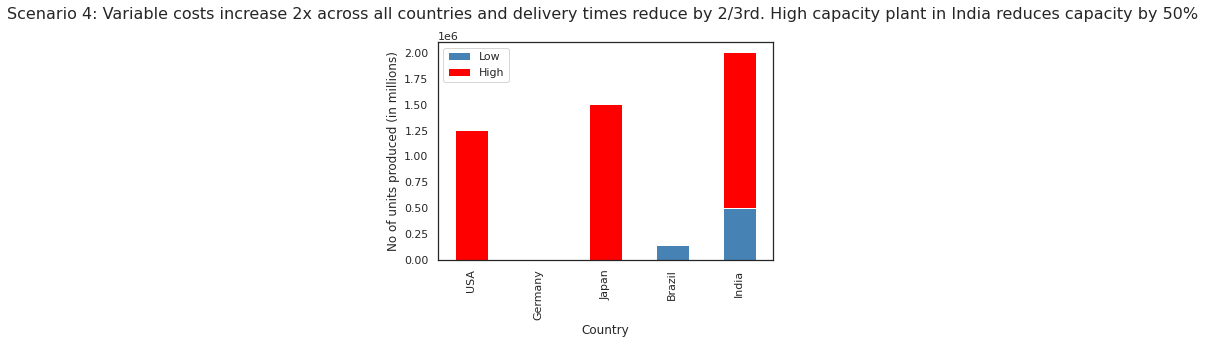

In [ ]:
sns.set(style = 'white')
scen_4 = df_plot4.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Scenario 4: Variable costs increase 2x across all countries and delivery times reduce by 2/3rd. High capacity plant in India reduces capacity by 50% \n', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('No of units produced (in millions)')
scen_4
plot_list.append(scen_4)

In [ ]:
dict_sce4 = {'Location':['USA','Germany','Japan','Brazil','India'],
             'USA':[1050000,0,0,0,1750000],
             'Germany':[0,0,0,0,900000],
            'Japan':[200000,0,1500000,0,0],
            'Brazil':[0,0,0,145000,0],
            'India':[0,0,0,0,160000]}
df_sce4 = pd.DataFrame(dict_sce4)
df_sce4

,Location,USA,Germany,Japan,Brazil,India
0,USA,1050000,0,200000,0,0
1,Germany,0,0,0,0,0
2,Japan,0,0,1500000,0,0
3,Brazil,0,0,0,145000,0
4,India,1750000,900000,0,0,160000


Scenario 5: CO2 emission limits set at 50,000 kgs/ton/liter and storage costs increase 2x. High capacity plants at all countries set at 1000k units

In [ ]:
dict_plot5 = {'Location':['USA','Germany','Japan','Brazil','India'], 'Low':[500000,0,500000,395000,500000],'High':[1000000,0,1000000,0,1000000]}
df_plot5 = pd.DataFrame(dict_plot5)
df_plot5


,Location,Low,High
0,USA,500000,1000000
1,Germany,0,0
2,Japan,500000,1000000
3,Brazil,395000,0
4,India,500000,1000000


In [ ]:
dict_sce5 = {'Location':['USA','Germany','Japan','Brazil','India'],
             'USA':[1300000,0,0,250000,1250000],
             'Germany':[0,0,0,0,900000],
            'Japan':[200000,0,1500000,0,0],
            'Brazil':[0,0,0,145000,0],
            'India':[0,0,0,0,160000]}
df_sce5 = pd.DataFrame(dict_sce5)
df_sce5

,Location,USA,Germany,Japan,Brazil,India
0,USA,1300000,0,200000,0,0
1,Germany,0,0,0,0,0
2,Japan,0,0,1500000,0,0
3,Brazil,250000,0,0,145000,0
4,India,1250000,900000,0,0,160000


Interactive plot of all 5 scenarios:


In [ ]:
import ipywidgets as widgets

In [ ]:
def interactive_plot(name):
    print(f'Choose the Scenario: {name}')
    if name == 'Scenario 1':
        sns.set(style = 'white')
        scen_1 = df_plot1.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
        plt.title('Scenario 1: Standard Conditions \n', fontsize = 16)
        plt.xlabel('Country')
        plt.ylabel('No of units produced (in millions)')
        scen_1
    if name == 'Scenario 2':
        sns.set(style = 'white')
        scen_2 = df_plot2.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
        plt.title('Scenario 2: Freight costs increase by 3x due to COVID pandemic \n', fontsize = 16)
        plt.xlabel('Country')
        plt.ylabel('No of units produced (in millions)')
        scen_2
    if name == 'Scenario 3':
        sns.set(style = 'white')
        scen_3 = df_plot3.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
        plt.title('Scenario 3: Demand increases 5x in Germany, Brazil and India \n', fontsize = 16)
        plt.xlabel('Country')
        plt.ylabel('No of units produced (in millions)')
        scen_3
    if name == 'Scenario 4':
        sns.set(style = 'white')
        scen_4 = df_plot4.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
        plt.title('Scenario 4: Variable costs increase 2x across all countries and delivery times reduce by 1/3rd. High capacity plant in India reduces capacity by 50% \n', fontsize = 16)
        plt.xlabel('Country')
        plt.ylabel('No of units produced (in millions)')
        scen_4
    if name == 'Scenario 5':
        sns.set(style = 'white')
        df_plot5.set_index('Location').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
        scen_5 = plt.title('Scenario 5: CO2 emission limits set at 500,000 kgs/ton and storage costs increase 2x. High capacity plants at all countries set at 1000k units \n', fontsize = 16)
        plt.xlabel('Country')
        plt.ylabel('No of units produced (in millions)')
        scen_5

In [ ]:
widgets.interact(interactive_plot, name=['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5']);

interactive(children=(Dropdown(description='name', options=('Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenari…